# Overview of Dataset

In [1]:
# Setting up Environment
import numpy as np
import sklearn as skl
import pandas as pd

# EDA Setup
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing Setup
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Stroke-Dataset.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Checking for missing values

In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Data Splitting

In [5]:
# Variables for Splitting data
X = df.drop(labels=["stroke"], axis=1)
y = df["stroke"]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=20)

# Displaying Set Shape
print(f"X_train\nShape: {X_train.shape}\n\nX_test\nShape: {X_test.shape}\n")
print(f"y_train\nShape: {y_train.shape}\n\ny_test\nShape: {y_test.shape}\n")

X_train
Shape: (3577, 11)

X_test
Shape: (1022, 11)

y_train
Shape: (3577,)

y_test
Shape: (1022,)



In [6]:
# Merging for Training Data for EDA  
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)
df_train.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1611,14832,Female,81.0,0,1,Yes,Private,Urban,84.93,31.8,Unknown,0
2623,67724,Female,65.0,0,0,Yes,Private,Rural,70.06,35.8,Unknown,0
3608,70022,Male,32.0,0,0,No,Private,Rural,61.11,32.7,never smoked,0
4521,34130,Male,54.0,1,0,Yes,Private,Rural,116.44,24.5,never smoked,0
2475,4400,Female,36.0,0,0,Yes,Private,Urban,68.48,24.3,never smoked,0


# Univariant Analysis

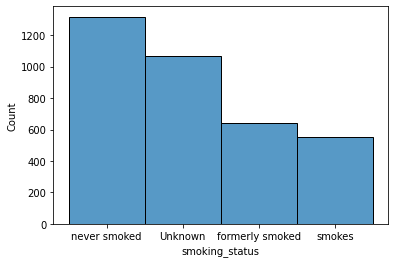

In [ ]:
sns.histplot(data=df_train, x="smoking_status")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


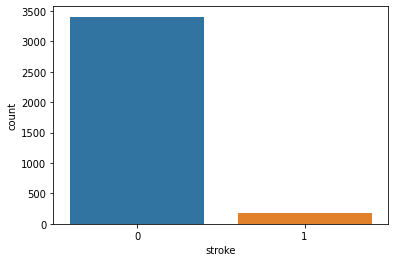

In [ ]:
sns.countplot(df_train["stroke"])

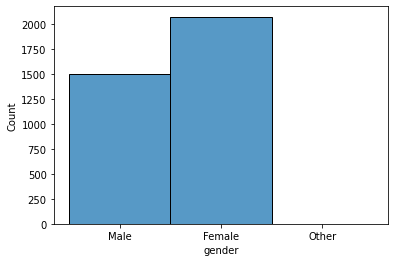

In [ ]:
sns.histplot(data=df_train, x="gender")

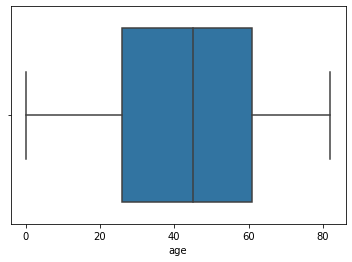

In [ ]:
sns.boxplot(data=df_train, x="age")

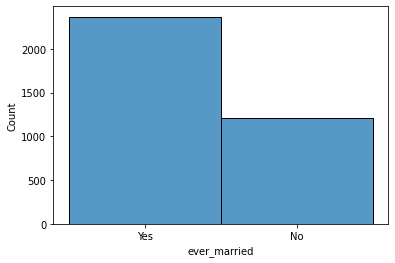

In [ ]:
sns.histplot(data=df_train, x="ever_married")

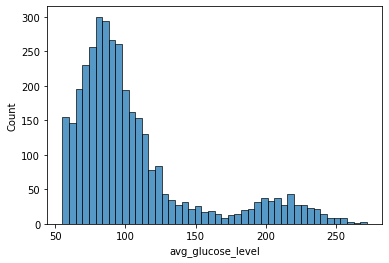

In [ ]:
sns.histplot(data=df_train, x="avg_glucose_level")

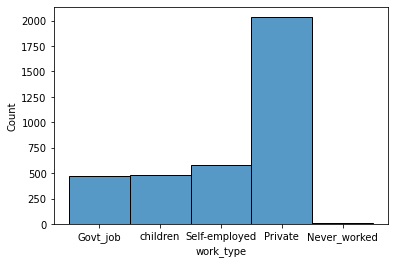

In [ ]:
sns.histplot(data=df_train, x="work_type")

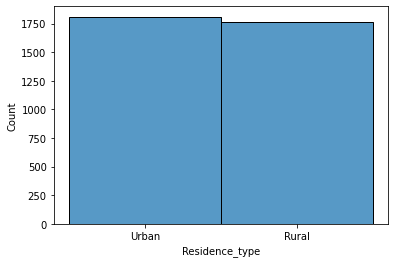

In [ ]:
sns.histplot(data=df_train, x="Residence_type")

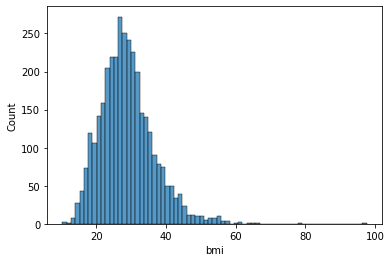

In [ ]:
sns.histplot(data=df_train, x="bmi")

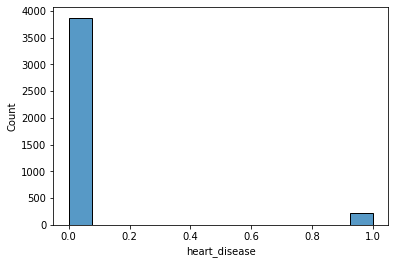

In [ ]:
sns.histplot(data=df_train, x="heart_disease")

# Multivariant Analysis

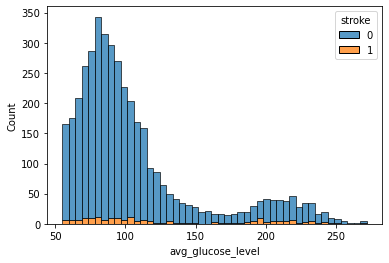

In [ ]:
sns.histplot(data=df_train, x="avg_glucose_level", hue="stroke", multiple="stack")

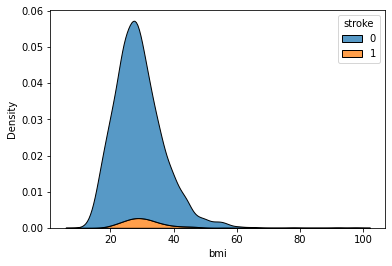

In [ ]:
sns.kdeplot(data=df_train, x="bmi", hue="stroke", multiple="stack")

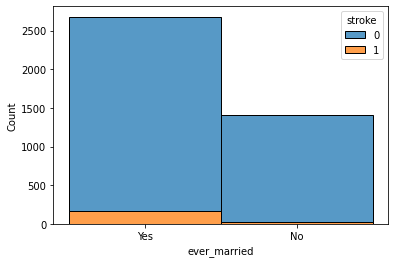

In [ ]:
sns.histplot(data=df_train, x="ever_married", hue="stroke", multiple="stack")

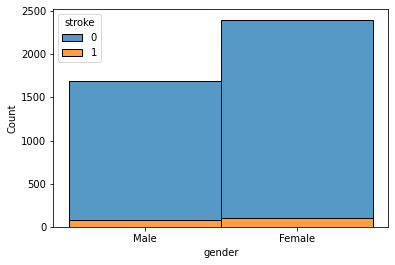

In [ ]:
sns.histplot(data=df_train, x="gender", hue="stroke", multiple="stack")

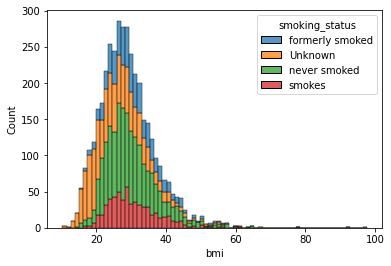

In [ ]:
sns.histplot(data=df_train, x="bmi", hue="smoking_status", multiple="stack")

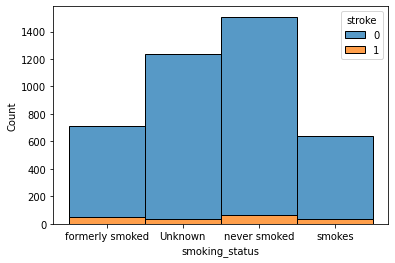

In [ ]:
sns.histplot(data=df_train, x="smoking_status", hue="stroke", multiple="stack")

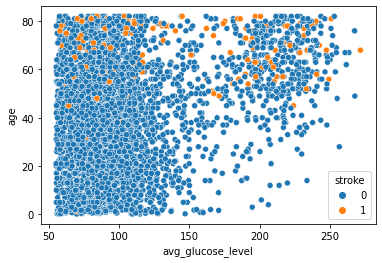

In [ ]:
sns.scatterplot(data=df_train, x="avg_glucose_level", y="age", hue="stroke")

# Pre-processing for Training Set

Value Encodings

In [7]:
df_train = pd.get_dummies(df_train, columns=['gender','work_type','Residence_type','smoking_status'])
df_train = pd.get_dummies(df_train, drop_first=True, columns=["ever_married"])

In [8]:
#df_train['gender_Other'].fillna('0', inplace=True)
df_train = df_train.drop(labels=["id",'gender_Other'], axis=1)

Interpolation

In [9]:
# Interpolation
df_train_interpo = df_train.interpolate(method='linear')

Feature Selection

In [10]:
df_train_interpo = df_train_interpo[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'work_type_Self-employed', 'work_type_children', 'ever_married_Yes','stroke']]

Oversampling

In [11]:
# Synthetic Oversampling
X = df_train_interpo.drop(labels=["stroke"], axis=1)
y = df_train_interpo["stroke"]
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

# Pre-processing for Validation Set (Don't Oversample)

In [38]:
df_val = pd.merge(X_val, y_val, left_index=True, right_index=True)

In [39]:
df_val = pd.get_dummies(df_val, columns=['gender','work_type','Residence_type','smoking_status'])
df_val = pd.get_dummies(df_val, drop_first=True, columns=["ever_married"])

In [40]:
# Interpolation
df_val = df_val.interpolate(method='linear')

In [41]:
df_val = df_val[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'work_type_Self-employed', 'work_type_children', 'ever_married_Yes','stroke']]

# Pre-processing for Testing Set (Don't Oversample)

In [42]:
# Split Merging for Testing Data 
df_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
#df_test.head(5)

In [43]:
df_test = pd.get_dummies(df_test, columns=['gender','work_type','Residence_type','smoking_status'])
df_test = pd.get_dummies(df_test, drop_first=True, columns=["ever_married"])

In [44]:
df_test = df_test.drop(labels=["id"], axis=1)

Interpolation for Testing Dataset

In [45]:
# Interpolation
df_test = df_test.interpolate(method='linear')

Feature Selection

In [46]:
df_test = df_test[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'work_type_Self-employed', 'work_type_children', 'ever_married_Yes','stroke']]

# Training Model Development

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Building & Training Model
clf = SVC(kernel='linear')

# training the model
clf.fit(X, y)

SVC(kernel='linear')

# Testing Model (On "Seen" Data)

In [30]:
# Making Predictions with Seen (training) data
pred = clf.predict(X)

# Printing first 5 predictions
print(pred[:5])

# Testing the Accuracy of the Algorithm
print(accuracy_score(y, pred))

[0 0 0 0 0]
0.9084114888628371


In [35]:
# confusion matrix
act = y
print(confusion_matrix(act,pred))

[[3412    0]
 [ 625 2787]]


In [36]:
print(classification_report(act,pred)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3412
           1       1.00      0.82      0.90      3412

    accuracy                           0.91      6824
   macro avg       0.92      0.91      0.91      6824
weighted avg       0.92      0.91      0.91      6824



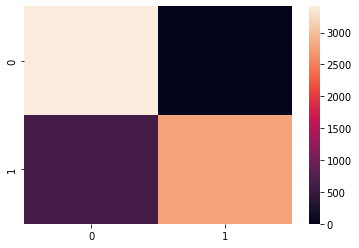

In [33]:
# Heat map
sns.heatmap(confusion_matrix(act,pred))

# Tuning Model (With Validation Data, 'Unseen' Data)

Examples of hyperparameters to fine tune:
* Kernel type (linear, RBF, polynomial)
* Regulization parameter
* Kernel Coefficient Gamma

Once you have selected the best combination of values retrain model with values, then progress on to evaluating the performance of the test set. Implementing grid-search is likely to yield better parameters

In [49]:
X_val_tune = df_val.drop(labels=["stroke"], axis=1)
y_val_tune = df_val['stroke']

testing on unseen data before 

In [73]:
# predication for validation set
pred = clf.predict(X_val_tune)

# Printing first 5 predictions
print(pred[:5])

# Testing the Accuracy of the Algorithm
print(accuracy_score(y_val_tune, pred))

[0 0 0 0 0]
0.9452054794520548


In [74]:
#confusion matrix
act = y_val_tune
print(confusion_matrix(act,pred))

[[483   0]
 [ 28   0]]


In [75]:
print(classification_report(act,pred)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


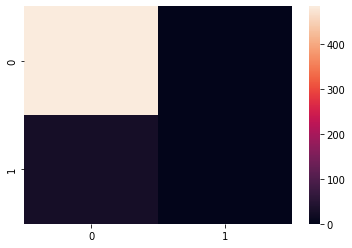

In [76]:
# Heat map
sns.heatmap(confusion_matrix(act,pred))

Tuneing with a hyperparameter optimizer

In [ ]:
# Implementing Tuning Function
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_distributions = {
    "gamma": [0.001, 0.01, 0.1, 1, 10],
    "degree": [1, 2, 3, 4, 5],
    "C": [0.001, 0.01, 0.1, 1, 10],
}

# Define the SVM model
model = svm.SVC()

# Define the random search
random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=50, cv=5, scoring="accuracy", verbose=1
)

In [ ]:
# Fit the model to the data
random_search.fit(X_val_tune, y_val_tune)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10]},
                   scoring='accuracy', verbose=1)

Best hyperparameters from grid 

In [ ]:
# Print the best hyperparameters found
print(random_search.best_params_)

{'gamma': 0.001, 'degree': 4, 'C': 0.01}


Model Retraining

In [80]:
# Building & Training Model
clfN = SVC(kernel='poly', C=0.01, degree=4, gamma=0.001)

# training the model
clfN.fit(X, y)

SVC(C=0.01, degree=4, gamma=0.001, kernel='poly')

Examination of Validation Performance

In [81]:
# predication for validation set
pred = clfN.predict(X_val_tune)

# Printing first 5 predictions
print(pred[:5])

# Testing the Accuracy of the Algorithm
print(accuracy_score(y_val_tune, pred))

[0 0 0 0 0]
0.9080234833659491


In [82]:
#confusion matrix
act = y_val_tune
print(confusion_matrix(act,pred))

[[459  24]
 [ 23   5]]


# Testing Model (On "Unseen" Data)

In [83]:
# Testing  Dataset Variables (Post-Preprocessing)
X_tst = df_test.drop(labels=["stroke"], axis=1)
y_tst = df_test['stroke']

In [91]:
# Making Predictions with Unseen (testing) data
pred = clfN.predict(X_tst)

# Printing first 5 predictions
print(pred[:5])

# Testing the Accuracy of the Algorithm
print(accuracy_score(y_tst, pred))

[0 0 0 0 0]
0.9207436399217221


In [92]:
#confusion matrix
act = y_tst
print(confusion_matrix(act,pred))

[[930  36]
 [ 45  11]]


In [93]:
print(classification_report(act,pred)) 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       966
           1       0.23      0.20      0.21        56

    accuracy                           0.92      1022
   macro avg       0.59      0.58      0.59      1022
weighted avg       0.91      0.92      0.92      1022



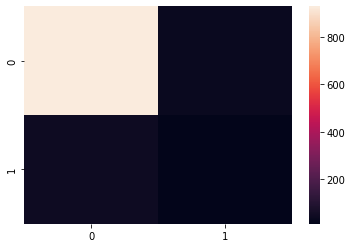

In [87]:
# Heat map
sns.heatmap(confusion_matrix(act,pred))